# __Beer Reviews Analysis__
-- 09/23/19
-- Akshay Kulkani

## 1. Introduction

This notebook explores the provided beer optimized_df dataset to perform exploratory data analysis, gather insight, determine significant factors leading to and estimating overall beer quality ...

-----------------------------------------------------
####  *Package installations and Environment Prep*

In [4]:
# %%capture 
# # comment line above to show output

# !python -m pip install pandas
# !python -m pip install numpy
# !python -m pip install sklearn
# !python -m pip install matplotlib
# !python -m pip install seaborn
# !python -m pip install plotly
# !python -m pip install plotly.offline
# !python -m pip install dash



In [46]:
# // Boiler plate imports

import pandas as pd
import os
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import pandas_profiling as ppf
%matplotlib inline


#### *Importing and Displying the data.*

In [6]:
# Importing the csv and basic stats

review_df = pd.read_csv(r"beer_reviews_2.csv")

In [7]:
review_df.head(5) # display raw data 

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [8]:
review_df.shape # dims

(1586614, 13)

In [9]:
review_df.describe() # basic numeric col-wise stats
# print(((optimized_df_df["brewery_name"].unique().size)))

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


----------------------------------------------------
## 2. Pre-EDA Optimizations.

`Pandas DataFrames are great!` - *Me*\
\
They offer flexibilty, a rich and easy-to-use API and robust performance.
Ususally when working in Python using pandas with small datasets (a few megabytes), performance is almost never a problem. But When we move to larger datasets (100 megabytes to multiple gigabytes), pandas can slow down and performance issues can make run times much longer, and many times this can cause code to fail entirely due to insufficient memory .

Therefore through experience and hardships (like trying to fit huge inverted indexes in memory), I can attest that tweaking Python’s memory usage with pandas, and reducing a dataframe’s memory footprint goes a long way in speeding up analyses and ensuring good performance, I try to implement minor optimizations whenever I can, and pesonally it's a step thats often overlooked but is quite beneficial to include.


*There are great resources that anyone can find on the internet that explain downcasting and how python/pandas handles types of subtypes of data within a dataframe. I definitely think it merits more attention*


In [10]:
review_df.dtypes # Col-types

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [11]:
# .info() method gives a pretty good idea of the footprint

review_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 565.4 MB


In [12]:
# Function to compute mem usage of pandas objects

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

# ------------------------------------------------------------------------------------

#  pd.to_numeric() to downcast  numeric types. and DataFrame.select_dtypes to select only the integer columns

review_df_int = review_df.select_dtypes(include=['int'])
review_df_int_reduced = review_df_int.apply(pd.to_numeric,downcast='unsigned')


# size halved !
print(mem_usage(review_df_int))
print(mem_usage(review_df_int_reduced)) 


36.31 MB
15.13 MB


In [13]:
# perform same thing with the float columns. (50% reduction in size.)

review_df_float = review_df.select_dtypes(include=['float'])
review_df_float_reduced = review_df_float.apply(pd.to_numeric,downcast='float')


as for object dtypes, you have to be careful, it may be tempting to convert them to categorical type but the memory optimization is only worth it if the resulting categorical variable does not have `High Cardinality`, (too many unique values are bad for mem optimization of this kind)

In [14]:
# gives us an idea of the possible categorical conversions

review_df_obj = review_df.select_dtypes(include=['object']).copy()
review_df_obj.describe()

,brewery_name,review_profilename,beer_style,beer_name
count,1586599,1586266,1586614,1586614
unique,5742,33387,104,56857
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,39444,5817,117586,3290


In [15]:
#fucntion to check if the number of unique values is less than 20%, and if so, convert it to the category type

review_df_obj_reduced = pd.DataFrame()
for col in review_df_obj.columns:
    num_unique_values = len(review_df_obj[col].unique())
    num_total_values = len(review_df_obj[col])
    if num_unique_values / num_total_values < 0.2:
        review_df_obj_reduced.loc[:,col] = review_df_obj[col].astype('category')
    else:
        review_df_obj_reduced.loc[:,col] = review_df_obj[col]



print(mem_usage(review_df_obj))
print(mem_usage(review_df_obj_reduced))
# 94.02% Reduction in mem usage !

print("Mem reduced by :" +str(((458.86-27.40)/458.86)*100)+"% !")


458.86 MB
27.40 MB
Mem reduced by :94.0286797716079% !


In [30]:
# Applying Mem optimizations

optimized_df = review_df.copy()

optimized_df[review_df_int_reduced.columns] = review_df_int_reduced
optimized_df[review_df_float_reduced.columns] = review_df_float_reduced
optimized_df[review_df_obj_reduced.columns] = review_df_obj_reduced

print("Original df : " +mem_usage(review_df))
print("Optimized DF : "+ mem_usage(optimized_df))

Original df : 567.80 MB
Optimized DF : 78.85 MB


By using simple techniques like :

    - Downcasting numeric columns to more efficient types.
    - Converting appropriate string columns to the categorical type.
    
 >A lot of the memory overhead was removed and the new data frame is much lighter than the original one ( by `86%!`). Which is why I find it so crucial.




In [17]:
optimized_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


-------------------------------------------------------

## 3. Exploratory Data Analysis [EDA]



In [31]:
# First converting review_time col to date-time column.

optimized_df[ 'review_time' ] = pd.to_datetime( optimized_df[ 'review_time' ], unit = 's' )

optimized_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


#### *3.1 Missing Value Checks.*

In [35]:
# Checking for null values
print(optimized_df.isnull().sum())

# Percent of data missing `beer_abv` values
print("Highest Percent Null Values of `beer_abv` column:", round(67785 / 1586614 * 100, 2),"%")

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64
Highest Percent Null Values of `beer_abv` column: 4.27 %


#### _3.2 Drop Null Values_

In [21]:
# Drop null row values
optimized_df = optimized_df.dropna()
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1518478 non-null uint16
brewery_name          1518478 non-null category
review_time           1518478 non-null datetime64[ns]
review_overall        1518478 non-null float32
review_aroma          1518478 non-null float32
review_appearance     1518478 non-null float32
review_profilename    1518478 non-null category
beer_style            1518478 non-null category
review_palate         1518478 non-null float32
review_taste          1518478 non-null float32
beer_name             1518478 non-null category
beer_abv              1518478 non-null float32
beer_beerid           1518478 non-null uint32
dtypes: category(4), datetime64[ns](1), float32(6), uint16(1), uint32(1)
memory usage: 87.2 MB


> *Removing all null values only affects the size of the dataset by a little over 4%.*

In [22]:
# Check for null values
print(optimized_df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


#### _3.3 Duplicate Data Handling_

If a user has rated the same beer more than once, then only keep their highest rating.

In [23]:
# Sort by user overall rating first
optimized_df = optimized_df.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
optimized_df = optimized_df.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')

optimized_df.info()

# Percent of data that are duplicates
print("Percent of Duplicate Values:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 1586613 to 39648
Data columns (total 13 columns):
brewery_id            1496263 non-null uint16
brewery_name          1496263 non-null category
review_time           1496263 non-null datetime64[ns]
review_overall        1496263 non-null float32
review_aroma          1496263 non-null float32
review_appearance     1496263 non-null float32
review_profilename    1496263 non-null category
beer_style            1496263 non-null category
review_palate         1496263 non-null float32
review_taste          1496263 non-null float32
beer_name             1496263 non-null category
beer_abv              1496263 non-null float32
beer_beerid           1496263 non-null uint32
dtypes: category(4), datetime64[ns](1), float32(6), uint16(1), uint32(1)
memory usage: 86.0 MB
Percent of Duplicate Values: 1.46 %


> *Removing all duplicate values drops about 1.5% of the remaining data.*

#### _3.4 Overview of Numeric Features_

In [62]:
# Couning unique breweries and beers reveals a disparity between brewery id and name 
print( 'Count of Unique breweries' )
print( 'By id:', optimized_df[ 'brewery_id' ].nunique() )
print( 'By name:', optimized_df[ 'brewery_name' ].nunique() )
print("\n")
print( 'Unique beers' )
print( 'By id:', optimized_df[ 'beer_beerid' ].nunique() )
print( 'By name:', optimized_df[ 'beer_name' ].nunique() )

Count of Unique breweries
By id: 5840
By name: 5742


Unique beers
By id: 66055
By name: 56857


> the disparity discourages the use of id as an identifier, names should be used in that case

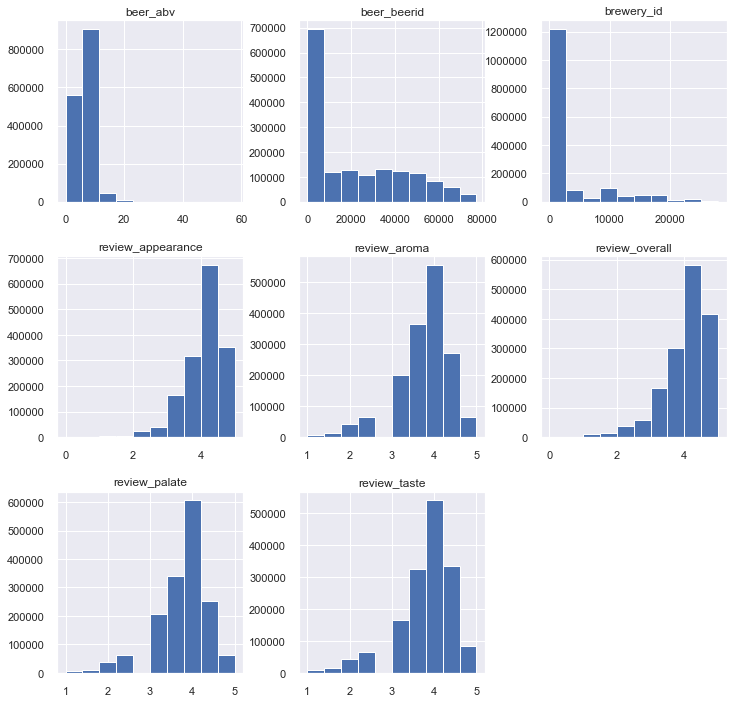

In [43]:
# Histograms of all numeric features
optimized_df.hist(figsize=(12,12))
plt.show()

|Numeric Variable| Distribution|Interpretation|
|---|---|---|
|`beer_abv`| Right Skewed Distribution  | Most beers seem to have less than 20% ABV|
|`review_aroma`| Normal | Most beers rated between 3 and 4|
|`review_palate`|Normal| Most beers rated between 3 and 4|
|`review_taste`|Normal| Most beers rated between 3.5 and 4.5 |
|`review_overall`|Left Skewed Distribution| Most beers rated 4 and higher|
|`review_appearance`| Left Skewed Distribution | Most beers rated 4 and higher|
|`review_time`|Left Skewed Distribution| Num of beers rated vs time suggests linearity|

also,\

|Numeric Variable| Distribution|Interpretation|
|---|---|---|
|`beer_beerid`| Right Skewed Distribution | Lower IDs have more reviews than higher IDs|
|`brewery_id`| Right Skewed Distribution| Lower IDs have more reviews than higher IDs|
but these may not be that useful

> *Also note the existence of ratings which have a value of 0 in the* `review_overall` *&* `review_appearance` *columns.*

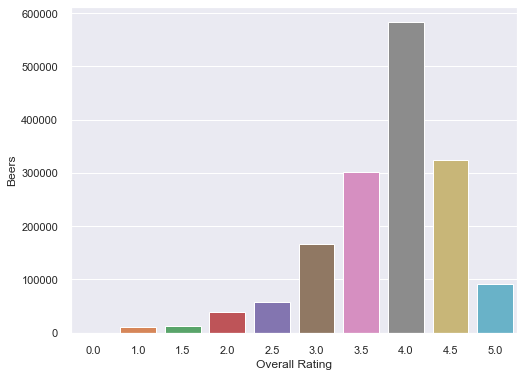

In [58]:
plt.figure(figsize=[8, 6])
sns.countplot(x='review_overall', data=optimized_df, saturation=0.9)
plt.xlabel("Overall Rating")
plt.ylabel("Beers");

#most beers seem to be rated in the 4 range

In [64]:
# Counting the number of users that have more than 1 review.
print( 'Unique users:', optimized_df
[ 'review_profilename' ].nunique() )
print( 'Unique users with more than 1 review:', optimized_df
[ 'review_profilename' ].value_counts()[ optimized_df
[ 'review_profilename' ].value_counts() > 1 ].shape[ 0 ], '-' , str( round( optimized_df
[ 'review_profilename' ].value_counts()[ optimized_df
[ 'review_profilename' ].value_counts() > 1 ].shape[ 0 ] / optimized_df
[ 'review_profilename' ].nunique(), 2 ) * 100 ) + '%' )

Unique users: 33387
Unique users with more than 1 review: 22944 - 69.0%


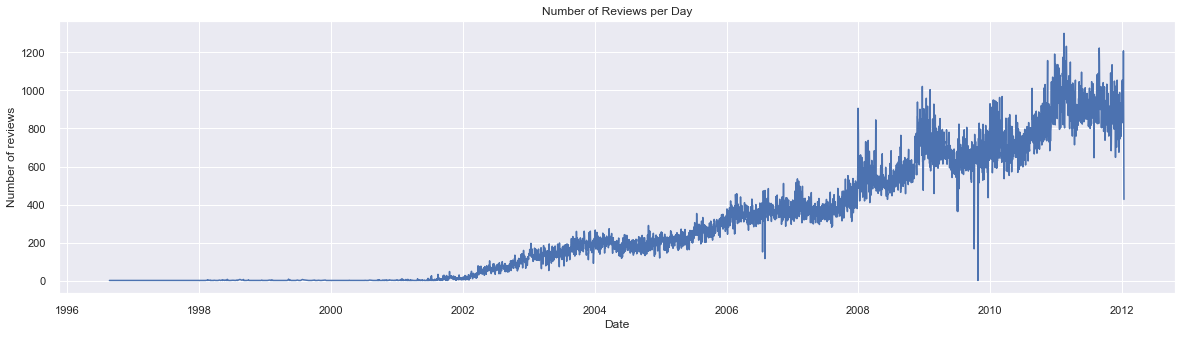

In [68]:
# Plotting Review count growth rate.

group_by_date = optimized_df[[ 'review_time' ]].groupby(optimized_df['review_time'].dt.date ).agg( [ 'count' ] )
plt.figure( figsize = ( 20, 5 ) )
plt.plot( group_by_date )
plt.xlabel( 'Date' )
plt.ylabel( 'Number of reviews' )
plt.title( 'Number of Reviews per Day' )
plt.show()

## (c) Recommending 3 Beers to a buddy?

Even if they were completely new to beer, A good recommendation would largely depend on the internal weightages or preferences of attributes of the beer or their likings to attributes of general drinks that the person has.

Yet If i were to recommend 3 beers to someone agnostically based purely on the dataset, one of the ways to do that would be finding a well-known beer with a high rating, so that the probability that my recommendations suceesful increases since the recommendations are drawn from data that resonates with the choices of the population. Instead of a beer that may be good but may not be publically popular due to my own bias


In [73]:
top_3_rec = optimized_df[['beer_name','review_overall']]\
    .pivot_table(index="beer_name", aggfunc=("count",'mean','median'))\
    .dropna()

top_3_rec.columns = top_3_rec.columns.to_series().str.join('_')
top_3_rec.reset_index(inplace=True)

#cosidering beers with more reviews
top_3_rec = top_3_rec.query('review_overall_count >= 3000')\
  .sort_values('review_overall_mean', ascending=False)\
  .head(3)

top_3_rec

,beer_name,review_overall_count,review_overall_mean,review_overall_median
36868,Old Rasputin Russian Imperial Stout,3111,4.174221,4.0
45811,Sierra Nevada Celebration Ale,3000,4.168667,4.0
900,90 Minute IPA,3290,4.145745,4.0


In [3]:
# New DataFrame - reviews
reviews = data_copy['review_overall']

for review in ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']:
    reviews = pd.merge(reviews, data_copy[review], how='outer')


## Data Cleaning

- Remove NaNs
- Other option is to impute the data to fill holes by looking at rating for similar beer styles.

In [4]:
reviews = reviews.dropna()
reviews.head()

,beer_beerid,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,436,Amstel Light,Light Lager,3.0,2.0,3.0,2.5,2.5
1,25414,Caldera Pale Ale,American Pale Ale (APA),4.0,3.5,3.5,4.0,4.0
2,57110,D.O.R.I.S. The Destroyer Double Imperial Stout,Russian Imperial Stout,4.5,4.5,4.5,5.0,5.0
3,1959,Farmhouse Summer Ale,American Blonde Ale,4.0,3.5,4.0,4.0,4.0
4,9689,White Rascal,Witbier,5.0,4.0,4.0,3.5,4.5


## Visualize Data

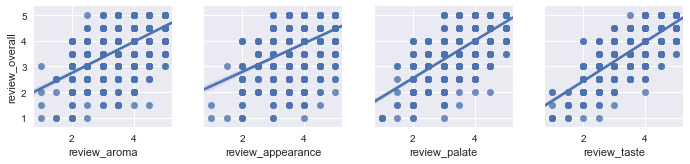

In [5]:
sns.pairplot(reviews, x_vars=['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], 
             y_vars=['review_overall'], kind='reg')

## Regression Models

- Isolate features (X) and targets(y). 
- Features are the attributes of the beers (aroma, appearance, palate and taste) and targets are overall reviews
- Split dats into KFolds (Bootstrapping/Cross-validation)
- Make an ML pipeline - Standardize data and fit a model
- Apply different regressors to compare the fits


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

X = reviews[['review_aroma', 'review_appearance','review_palate', 'review_taste']]
y = reviews['review_overall']

### Instantiate multiple regression models
- Linear Regression
- Lasso ( with L1 penalty)
- Ridge (with L2 penalty)
- KNeighbors

In [7]:
kfold = KFold(n_splits=10, shuffle=True)
#linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
#lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, fit_intercept=True))
#ridge = make_pipeline(StandardScaler(), Ridge(fit_intercept=True))
#kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor())

### Generate KFolds

In [8]:
data_sets = dict()
for split in range(10):
    _d = dict()
    for train_idx, test_idx in kfold.split(X):
        _d.update({
                'X_train' : X.iloc[train_idx],
                'X_test': X.iloc[test_idx],
                'y_train': y.iloc[train_idx],
                'y_test': y.iloc[test_idx]
            })
    data_sets.update({
            split : _d
        })

### Define Regression class 
- To wrap scikit-learn methods

In [9]:
from sklearn import metrics

class Regression:
    def __init__(self, regressor):
        self.regressor = regressor
        
    def fit(self, X, y):
        self.regressor.fit(X, y) 

    def predict(self, X, y):
        return self.regressor.predict(X)
    
    def score(self, X, y):
        return self.regressor.score(X, y)

    def mean_squared_error(self, X, y):
        return metrics.mean_squared_error(self.predict(X,y), y)
    
    def accuracy(self, X,y):
        return metrics.r2_score(self.predict(X,y), y)

### Define some utility functions
- model_fit: Fits a regression model using one of the pipelines defined above
- averaged_params: Fit a linear model for each data set generated by KFold splits
- compute_averages: Compute averages of coefficeints, error and score over KFolds

In [10]:
def model_fit(data_set, regressor):
    params = dict()
    regressor.fit(data_set['X_train'], data_set['y_train'])
    neighbors = True if 'neighbors' in regressor.regressor.steps[1][0] else False
    params.update({
            'coeffs' : [0.0] if neighbors else regressor.regressor.steps[1][1].coef_,
            'intercept': [0.0] if neighbors else regressor.regressor.steps[1][1].intercept_,
            'mean_sq_error': regressor.mean_squared_error(data_set['X_train'], data_set['y_train']),
            'accuracy': regressor.accuracy(data_set['X_test'], data_set['y_test'])
        })
    #print (params)
    return params
    
def compute_averages(list_of_dicts):
    averaged_params = dict()
    for set_key in list_of_dicts[0].keys():
        _list = [val for obj in list_of_dicts for key, val in obj.items() if key == set_key]
        if isinstance(_list[0], dict):
            averaged_params[set_key] = compute_averages(_list)
        elif isinstance(_list[0], list) or isinstance(_list[0], np.ndarray):
            if isinstance(_list[0][0], dict):
                sub_list = [[_list[i][j] for i in range(len(_list))] for j in range(len(_list[0]))]
                averaged_params[set_key] = [compute_averages(x) for x in sub_list]
            else:
                averaged_params[set_key] = np.round(np.average(np.array(_list), axis=0), 3)
        elif isinstance(_list[0], float) or isinstance(_list[0], int):
            averaged_params[set_key] = np.round(np.average(np.array(_list)), 3)
        else:
            pass
    return averaged_params

def averaged_params(regressor):
    multiple_params = list()
    for set_key, value in data_sets.items():
        multiple_params.append({
                set_key: model_fit(value, regressor)
            })
    return compute_averages(multiple_params)

### Linear Regression

In [11]:
# Linear Regression Pipeline
linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
regressor = Regression(linear)

# Averaged Model Parameters over 5 splits (or 5-fold cross-validation) 
averaged_params(regressor)

{0: {'accuracy': 0.501,
  'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]),
  'intercept': 3.823,
  'mean_sq_error': 0.151}}

### Lasso (Regularization - L1 Penalty)

In [12]:
# Lasso Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True))
    regressor = Regression(lasso)
    print ("Lasso: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Lasso: alpha =  1.0
{0: {'coeffs': array([ 0.,  0.,  0.,  0.]), 'intercept': 3.823, 'accuracy': -2.6980869800436656e+29, 'mean_sq_error': 0.42199999999999999}}
**********************
Lasso: alpha =  0.1
{0: {'coeffs': array([ 0.   ,  0.   ,  0.116,  0.322]), 'intercept': 3.823, 'accuracy': 0.071999999999999995, 'mean_sq_error': 0.16400000000000001}}
**********************
Lasso: alpha =  0.01
{0: {'coeffs': array([ 0.036,  0.009,  0.158,  0.354]), 'intercept': 3.823, 'accuracy': 0.47199999999999998, 'mean_sq_error': 0.151}}
**********************
Lasso: alpha =  0.001
{0: {'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]), 'intercept': 3.823, 'accuracy': 0.498, 'mean_sq_error': 0.151}}
**********************


### Ridge (Regularization - L2 Penalty)

In [13]:
# Ridge Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=True))
    regressor = Regression(ridge)
    print ("Ridge: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Ridge: alpha =  1.0
{0: {'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]), 'intercept': 3.823, 'accuracy': 0.501, 'mean_sq_error': 0.151}}
**********************
Ridge: alpha =  0.1
{0: {'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]), 'intercept': 3.823, 'accuracy': 0.501, 'mean_sq_error': 0.151}}
**********************
Ridge: alpha =  0.01
{0: {'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]), 'intercept': 3.823, 'accuracy': 0.501, 'mean_sq_error': 0.151}}
**********************
Ridge: alpha =  0.001
{0: {'coeffs': array([ 0.04 ,  0.014,  0.161,  0.356]), 'intercept': 3.823, 'accuracy': 0.501, 'mean_sq_error': 0.151}}
**********************


### KNeighbors

In [15]:
# KNeighbors Regression Pipeline
for neighbors in range(1,10):
    kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=neighbors))
    regressor = Regression(kneighbors)
    print ("KNeighbors: neighbors = ", neighbors)
    print (averaged_params(regressor))
    print ('**********************')
    

KNeighbors: neighbors =  1
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.34699999999999998, 'mean_sq_error': 0.32600000000000001}}
**********************
KNeighbors: neighbors =  2
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.27700000000000002, 'mean_sq_error': 0.17799999999999999}}
**********************
KNeighbors: neighbors =  3
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.312, 'mean_sq_error': 0.16300000000000001}}
**********************
KNeighbors: neighbors =  4
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.29599999999999999, 'mean_sq_error': 0.152}}
**********************
KNeighbors: neighbors =  5
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.29299999999999998, 'mean_sq_error': 0.151}}
**********************
KNeighbors: neighbors =  6
{0: {'coeffs': array([ 0.]), 'intercept': array([ 0.]), 'accuracy': 0.315, 'mean_sq_error': 0.14599999999999999}}
***********

In [ ]:
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

# tempdf =optimized_df.dropna()

# X = tempdf[["review_aroma","review_appearance","review_palate","review_taste","beer_style", "beer_abv","beer_name"]].copy().dropna()
# X["beer_style"] = X["beer_style"].cat.codes

# x_sample = X.sample(n=1000,replace=False,random_state=123)

# features = x_sample.drop(['beer_name'], axis=1)
# Target = x_sample["beer_name"]

# features

# X_std = StandardScaler().fit_transform(features)



# tsne = TSNE()
# tsne_results = tsne.fit_transform(X_std) 


# tsne_df = pd.DataFrame({'X':tsne_results[:,0],
#                         'Y':tsne_results[:,1],
#                         'beer_name':Target})



# tsne_df.reset_index(inplace=True)
# tsne_df.drop("index",axis=1,inplace=True)
# tsne_df.head()


# sns.scatterplot(x="X", y="Y",
#               hue="beer_name",
# #               palette=['purple','red','orange','brown','blue',
# #                        'dodgerblue','green','lightgreen','darkcyan', 'black'],
# #               legend='full',
#               data=tsne_df)


# # traceTSNE = go.Scatter(
# #     x = tsne_results[:,0],
# #     y = tsne_results[:,1],
# # #     name = Target,
# # #     hoveron = Target,
# #     mode = 'markers',
# # #     text = Target.unique(),
# #     showlegend = True,
# #     marker = dict(
# #         size = 8,
# # #         color = Target,
# #         colorscale ='Jet',
# #         showscale = False,
# #         line = dict(
# #             width = 2,
# #             color = 'rgb(255, 255, 255)'
# #         ),
# #         opacity = 0.8
# #     )
# # )
# # data = [traceTSNE]

# # layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
# #               hovermode= 'closest',
# #               yaxis = dict(zeroline = False),
# #               xaxis = dict(zeroline = False),
# #               showlegend= True,

# #              )

# # fig = go.Figure(data=data, layout=layout)

# # fig.show()
# # py.iplot(fig, filename='styled-scatter')

